# ACM20030 - Midterm 2

This midterm exam will be distributed at 2pm on Tuesday 21st of April. Five additional minutes are given at the start for you to download and load the notebook. Thus the midterm starts at 2:05pm. The midterm lasts **50 minutes** so you should finish at 2:55pm. You then have 10 minutes to upload the `Midterm2.ipynb` to BrightSpace by 3:05pm.

Save your notebook regularly as you are solving the problems.

I recommend you have a pen and paper handy to make small calculations (these do not need to be handed in).

The marks for each question are given in square brackets at the start of each question. The total marks for the test is 30.

You must complete the test indivudually. No contact with other class members, or anyone else, is allowed during the test.

When you finish the test you must upload your completed `Midterm2.ipynb` to BrightSpace. You can find the place to upload the file under the Assessments Tab -> Midterm2.

If there are any issues with uploading the midterm to BrightSpace. Please email me your completed Midterm2.ipynb before 3:05pm. My email address is niels.warburton@ucd.ie. Please include your student number if you email the test to me.

---

If you find it useful to do so you may view the [course examples](https://github.com/nielsw2/ACM20030-Examples) for reference. You may also view the NumPy and Matplotlib documentation if you want.  You should not use the internet to search for solutions. It is usually quite obvious when a student hands in code they have copied from, e.g., StackExchange. Please do not do this. If you hand in an answer that is copied from a webpage you will receive zero marks for that entire question.

You **may not** use any other Python libraries other than NumPy (including linalg) and Matplotlib. 

Please enter your student number in the cell below and run the two cells below that to load the libraries.

In [2]:
# Enter student number below
# 18302356

In [3]:
# Import NumPy, linalg and matplotlib
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt

In [4]:
# The below two lines set the default size and font size for matplotlib
plt.rcParams['figure.figsize'] = (16.0, 10.0)
plt.rcParams.update({'font.size': 22})

# Question 1: numerical integration

Use the `SimpsonsIntegrate` function below when answer this question

In [1]:
def SimpsonsIntegrate(f, a, b, N):
    dx = (b-a)/N
    xi = a
    i = 0
    area = 0
    while i < N:
        area += dx/6*(f(xi) + 4*f((2*xi+dx)/2) + f(xi+dx))
        xi += dx
        i+= 1
        
    return area

## Q1a [4 marks]

Numerically evaluate $$\int_0^1 \sin(x)\, dx$$

Compare your answer to the analytic result and use enough strips in the integration so that the relative error drops below `1e-10`, and show your result is at least this accurate.

In [6]:
def f(x):
    return np.sin(x)
SimpsonsIntegrate(f,0,1,100)

0.4596976941334566

In [33]:
def integrate(x):
    return -np.cos(x)

In [34]:
analsol = integrate(1)-integrate(0)
analsol

0.45969769413186023

## Q1b [6 marks]

By computing the numerical integral using N=10, 100 and 1000 strips, show that the Simpsons method converges as $N^{-4}$ to the correct answer for the above integral. Do this by plotting the difference between the approximations and the true result on a log-log plot, along with a $N^{-4}$ reference line.

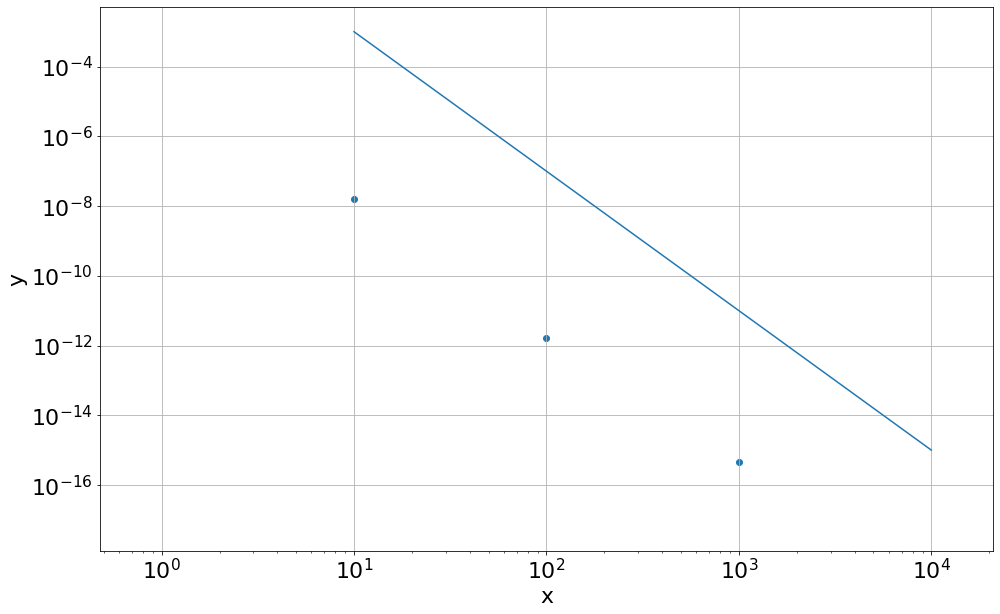

In [42]:
imax=3
booles = np.empty((imax,2))
i = 0
n = 10
while i < imax:
    booles[i, 0] = n
    booles[i, 1] = np.abs(SimpsonsIntegrate(f, 0, 1, n) - analsol)
    n*=10
    i+=1
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")
plt.xscale('log')
plt.yscale('log')
x = np.linspace(10,1e4)
N4 =10*x**-4
plt.scatter(booles[:,0], booles[:, 1], label ="difference between approx and true res")
plt.plot(x,N4)
    

# Question 2 : matrix norms

## Q2a [4 marks]

The dot product of two vectors $a$, $b$, each of length $n$ is given by

$$ a\cdot b = \sum_{i=1}^n a_i b_i$$

Two sample vectors and their dot product are given below

In [15]:
a = np.array([4.5, 6.7, 6.7])
b = np.array([8.8, -4.5, 3.3])

print("The dot product of a and b is:", np.dot(a,b))

The dot product of a and b is: 31.56


Complete the `DotProduct` function below to compute the dot product by using a loop (do not use `np.dot()` or a similar function). Test your answer on the vectors $a$ and $b$.

In [16]:
def DotProduct(a,b):
    result = 0 
    for i in range(0,len(a)):
        result += a[i]*b[i]
    return result
DotProduct(a,b)
    


31.56

## Q2b [6 marks]

In the lectures we looked at the $L^2$-norm. Another matrix norm is the Frobenius norm, $\lVert \cdot \rVert_F$ of a $m\times n$ matrix $A$ is defined as 

$$ \lVert A \rVert_F = \sqrt{\sum_{i=1}^m \sum_{j=1}^n |a_{ij}|^2 }$$

Complete the `FrobeniusNorm()` function below make it compute the Frobenius norm of a matrix using loops (don't use `la.norm`, or a similar function). 

In [17]:
def FrobeniusNorm(A):
    abssum = np.sqrt(sum(sum(np.abs(A)**2)))
    return abssum


Test your function using the below matrix. The `la.norm(A)` function returns the value of the Frobenius norm. You can use this to compare against your answer.

In [19]:
A = np.array([[1.4,-3.5,4.6],[4.5, 3.5, 6.6],[-7.7,5.5,6.6],[4.5,-4.5,4.3]])

In [21]:
print(FrobeniusNorm(A))
print(la.norm(A))

17.421825392306054
17.421825392306054


# Question 3: eigensystems


## Q3a [4 marks]


Using `la.eig()` compute the eigenvalues and eigenvectors of the matrix B below. Use a `for` loop that evaluates the left hand side of

$$ B.x - \lambda x =0$$

for each eigenvalue/eigenvector pair.

Reminder: `la.eig()` returns the eigenvalues and eigenvectors, and the eigenvectors are stored as the columns of a matrix.

Suggestion: write code that first tests one eigenvalue/eigenvector pair then write the loop that tests each pair in turn

In [12]:
B = np.array([[1.3, 4.5, 5.4], [5.6, 4.5 ,7.8], [6.0, 4.5,0.9]])

In [13]:
eigensystem = la.eig(B)
print("eigenvalues =", eigensystem[0])
print("eigenvectors = ", eigensystem[1])
print(eigensystem[1][:,0])

eigenvalues = [13.50189951 -2.23566197 -4.56623754]
eigenvectors =  [[-0.48410682 -0.39044521 -0.39740521]
 [-0.72528947  0.81669186 -0.44498051]
 [-0.48948522 -0.42493169  0.80253439]]
[-0.48410682 -0.72528947 -0.48948522]


## Q3b [2 marks]

As we discused in the lectures, one way to define the condition number of a matrix is given by 

$$\kappa(A) = \lVert A \lVert_2 \lVert A^{-1} \rVert_2 $$

Compute $\kappa(B)$ using this formula and where `B` is the matrix defined in Q3a. You may use `la.inv(B)` and `la.norm(B,2)` in this question.

Hint: you can check you result against `la.cond(B,2)`

In [22]:
la.cond(B,2)

6.783752998324849

In [43]:
eigenvalues = la.eig(B.T@B)[0]
lmax = np.max(eigenvalues)
lmin = np.min(eigenvalues)
print("condition number computed via norm definition:\t",la.norm(B,2)*la.norm(la.inv(B),2))
print("condition number computed via eigenvalue formula :",np.sqrt(lmax/lmin))
print("condition number computed via la.cond(B,2):\t",la.cond(B,2))

condition number computed via norm definition:	 6.783752998324855
condition number computed via eigenvalue formula : 6.783752998324856
condition number computed via la.cond(B,2):	 6.783752998324849


## Q3c [4 marks]

As we discussed in the lectures you can also compute the condition number via 

$$\kappa(A) = \sqrt{\frac{\lambda_\max}{\lambda_\min}}$$

where $\lambda_{\max/\min}$ are the minimum and maximum eigenvalues of $A^T A$

Using `np.transpose()`, `la.eig()` to compute the eigenvalues, compute the condition number of $A$ using the above formula.

In [26]:
a =np.matmul(np.transpose(B),B)
la.eig(a)

(array([192.92858453,  23.4890752 ,   4.19234027]),
 array([[-0.54423386, -0.68125505,  0.48959274],
        [-0.54512683, -0.15642751, -0.82363049],
        [-0.6376882 ,  0.71513774,  0.28623726]]))

In [29]:
np.sqrt(la.eig(a)[0][0]/la.eig(a)[0][2])

6.783752998324856

# Submission

You must upload your completed `Midterm2.ipynb` to BrightSpace. You can find the place to upload the file under the Assessments Tab -> Midterm2.

If there are any issues with uploading the midterm to BrightSpace. Please email me your completed Midterm2.ipynb. My email address is niels.warburton@ucd.ie.